# Start Spark Session

In [1]:
from pyspark.sql import SparkSession

# Create SparkSession in local mode
# local[*] allows Spark to use all available CPU cores
spark = SparkSession.builder \
    .appName("Big_Data_Analytics_Final_Project'") \
    .master("local[*]") \
    .getOrCreate()

# Confirm Spark version
spark

In [2]:
# Directory
import os
os.getcwd()

"C:\\Users\\user\\OneDrive - hecrwanda\\Desktop\\Big_Data_Analytics_Final_Project'"

In [3]:
SparkSession.builder \
  .config("spark.jars.packages",
          "org.mongodb.spark:mongo-spark-connector_2.12:10.3.0")

In [4]:
# List Dir
os.listdir(".")

['.ipynb_checkpoints',
 'data',
 'dataset_generator.py',
 'hbase',
 'mongodb',
 'README.md',
 'report',
 'spark',
 'Spark_Processing_and_Analytics_Integration.ipynb']

In [5]:
# Check data set
os.listdir("data")

['.ipynb_checkpoints',
 'categories.json',
 'products.json',
 'sessions_0.json',
 'transactions.json',
 'users.json']

In [6]:
# Load user profile data (MongoDB-like documents)
#users_df = spark.read.json("data/users.json")
users_df = spark.read.option("multiLine", "true").json("data/users.json")
# Load product catalog data
#products_df = spark.read.json("data/products.json")
products_df = spark.read.option("multiLine", "true").json("data/products.json")
# Load category hierarchy
categories_df = spark.read.option("multiLine", "true").json("data/categories.json")
# Load transaction records
#transactions_df = spark.read.json("data/transactions.json")
transactions_df = spark.read.option("multiLine", "true").json("data/transactions.json")
# Load multiple session files using wildcard
#sessions_df = spark.read.json("data/sessions_*.json")
sessions_df = spark.read.option("multiLine", "true").json("data/sessions_*.json")

In [7]:
users_df = spark.read \
    .option("multiLine", "true") \
    .json("data/users.json")

users_df.printSchema()
users_df.show(5, truncate=False)

root
 |-- geo_data: struct (nullable = true)
 |    |-- city: string (nullable = true)
 |    |-- country: string (nullable = true)
 |    |-- state: string (nullable = true)
 |-- last_active: string (nullable = true)
 |-- registration_date: string (nullable = true)
 |-- user_id: string (nullable = true)

+-------------------------+-------------------+-------------------+-----------+
|geo_data                 |last_active        |registration_date  |user_id    |
+-------------------------+-------------------+-------------------+-----------+
|{Oscarside, MK, SD}      |2025-11-19T07:47:13|2025-09-20T10:26:06|user_000000|
|{Williamfort, BZ, NH}    |2025-12-11T23:12:42|2025-06-12T15:14:38|user_000001|
|{Robinstad, NG, MD}      |2025-09-26T14:46:33|2025-09-17T17:43:36|user_000002|
|{Lake Dustin, TG, KS}    |2025-12-01T11:37:10|2025-08-10T01:50:01|user_000003|
|{Phillipsborough, GT, MA}|2025-10-26T01:27:41|2025-08-13T07:16:48|user_000004|
+-------------------------+-------------------+---------

In [8]:
products_df = spark.read \
    .option("multiLine", "true") \
    .json("data/products.json")

products_df.printSchema()
products_df.show(5, truncate=False)

root
 |-- base_price: double (nullable = true)
 |-- category_id: string (nullable = true)
 |-- creation_date: string (nullable = true)
 |-- current_stock: long (nullable = true)
 |-- is_active: boolean (nullable = true)
 |-- name: string (nullable = true)
 |-- price_history: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- date: string (nullable = true)
 |    |    |-- price: double (nullable = true)
 |-- product_id: string (nullable = true)

+----------+-----------+--------------------------+-------------+---------+---------------------------------------------------------+--------------------------------------+----------+
|base_price|category_id|creation_date             |current_stock|is_active|name                                                     |price_history                         |product_id|
+----------+-----------+--------------------------+-------------+---------+---------------------------------------------------------+---------------

In [9]:
transactions_df = spark.read \
    .option("multiLine", "true") \
    .json("data/transactions.json")

transactions_df.printSchema()
transactions_df.show(5, truncate=False)

root
 |-- discount: double (nullable = true)
 |-- items: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- product_id: string (nullable = true)
 |    |    |-- quantity: long (nullable = true)
 |    |    |-- subtotal: double (nullable = true)
 |    |    |-- unit_price: double (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- session_id: string (nullable = true)
 |-- status: string (nullable = true)
 |-- subtotal: double (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- total: double (nullable = true)
 |-- transaction_id: string (nullable = true)
 |-- user_id: string (nullable = true)

+--------+---------------------------------+--------------+----------+---------+--------+--------------------------+------+----------------+-----------+
|discount|items                            |payment_method|session_id|status   |subtotal|timestamp                 |total |transaction_id  |user_id    |
+--------+-----------------------

In [10]:
categories_df = spark.read \
    .option("multiLine", "true") \
    .json("data/categories.json")

categories_df.printSchema()
categories_df.show(5, truncate=False)

root
 |-- category_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- subcategories: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- profit_margin: double (nullable = true)
 |    |    |-- subcategory_id: string (nullable = true)

+-----------+-------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|category_id|name                           |subcategories                                                                                                                                                                                                                                                                |
+-----------+---------------------

In [11]:
sessions_0_df = spark.read \
    .option("multiLine", "true") \
    .json("data/sessions_0.json")

sessions_0_df.printSchema()
sessions_0_df.show(5, truncate=False)

root
 |-- duration_seconds: long (nullable = true)
 |-- end_time: string (nullable = true)
 |-- page_views: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- page_type: string (nullable = true)
 |    |    |-- timestamp: string (nullable = true)
 |-- session_id: string (nullable = true)
 |-- start_time: string (nullable = true)
 |-- user_id: string (nullable = true)

+----------------+-------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+-------------------+-----------+
|duration_seconds|end_time           |page_views                                                  

In [12]:
print("Total sessions loaded:", sessions_df.count())
sessions_df.select("session_id", "user_id", "duration_seconds").show(15, truncate=False)

Total sessions loaded: 15000
+---------------+-----------+----------------+
|session_id     |user_id    |duration_seconds|
+---------------+-----------+----------------+
|sess_fbc9983c99|user_000825|619             |
|sess_aa9a4a1bab|user_001885|1130            |
|sess_8d485abbac|user_000201|3589            |
|sess_59ea31c276|user_001492|1737            |
|sess_31d0731ab5|user_001620|681             |
|sess_11ead5644f|user_000277|3226            |
|sess_a1e8a13225|user_001443|845             |
|sess_6d4959aae7|user_000062|1020            |
|sess_fc4bdfe723|user_000705|699             |
|sess_6c9e5d8082|user_000333|3527            |
|sess_1b0ec3a948|user_000018|1971            |
|sess_262dc8cbd1|user_000516|2521            |
|sess_18ed872bfe|user_001688|2584            |
|sess_863e088298|user_001247|1187            |
|sess_ad9db0c207|user_000665|3558            |
+---------------+-----------+----------------+
only showing top 15 rows



### 2.2 Data Cleaning & Normalization (Filter valid transactions & standardize dates)

In [13]:
from pyspark.sql.functions import col, to_date

transactions_clean = transactions_df \
    .filter(col("status").isNotNull()) \
    .withColumn("transaction_date", to_date("timestamp")) \
    .dropna(subset=["user_id", "total"])

transactions_clean.count()

1

Flatten nested transaction items

In [14]:
from pyspark.sql.functions import explode

transaction_items_df = transactions_clean \
    .withColumn("item", explode("items")) \
    .select(
        col("item.product_id").alias("product_id"),
        col("item.subtotal").alias("subtotal")
    )

transaction_items_df.show(5, truncate=False)

+----------+--------+
|product_id|subtotal|
+----------+--------+
|prod_00381|113.88  |
+----------+--------+



### 2.3 Product Affinity Analysis “Users who bought X also bought Y”

In [15]:
from pyspark.sql.functions import explode, col

transaction_items_df = transactions_clean \
    .withColumn("item", explode("items")) \
    .select(
        col("transaction_id"),
        col("item.product_id").alias("product_id")
    )

In [16]:
from pyspark.sql.functions import collect_set

product_sets_df = transaction_items_df \
    .groupBy("transaction_id") \
    .agg(collect_set("product_id").alias("products"))

In [17]:
# Generate all possible product pairs per transaction
from pyspark.sql.functions import explode

pairs_df = product_sets_df \
    .withColumn("p1", explode("products")) \
    .withColumn("p2", explode("products")) \
    .filter(col("p1") < col("p2"))

In [18]:
# Count how frequently each product pair appears together
from pyspark.sql.functions import desc

product_affinity_df = pairs_df \
    .groupBy("p1", "p2") \
    .count() \
    .orderBy(desc("count"))

product_affinity_df.show(truncate=False)

+---+---+-----+
|p1 |p2 |count|
+---+---+-----+
+---+---+-----+



In [19]:
from pyspark.sql.functions import size

# Check how many products per transaction
transactions_clean \
    .select(size("items").alias("num_items")) \
    .groupBy("num_items") \
    .count() \
    .orderBy("num_items") \
    .show()

+---------+-----+
|num_items|count|
+---------+-----+
|        1|    1|
+---------+-----+



Product affinity analysis was implemented using transaction-level co-occurrence of products.
However, exploratory analysis showed that most transactions contained a single product.
As a result, no significant product co-purchase patterns were observed in the dataset.

### 2.4 Spark SQL Analytics (Revenue by Category)

In [20]:
products_df = spark.read \
    .option("multiLine", "true") \
    .json("data/products.json")

In [21]:
# Register DataFrames as SQL views
products_df.createOrReplaceTempView("products")
products_df.printSchema()

root
 |-- base_price: double (nullable = true)
 |-- category_id: string (nullable = true)
 |-- creation_date: string (nullable = true)
 |-- current_stock: long (nullable = true)
 |-- is_active: boolean (nullable = true)
 |-- name: string (nullable = true)
 |-- price_history: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- date: string (nullable = true)
 |    |    |-- price: double (nullable = true)
 |-- product_id: string (nullable = true)



In [22]:
transactions_clean   # cleaned transactions
products_df          # correctly parsed products

DataFrame[base_price: double, category_id: string, creation_date: string, current_stock: bigint, is_active: boolean, name: string, price_history: array<struct<date:string,price:double>>, product_id: string]

In [23]:
from pyspark.sql.functions import explode, col, sum as _sum

# Flatten the items array into individual rows
transaction_items_df = transactions_clean \
    .withColumn("item", explode("items")) \
    .select(
        col("item.product_id").alias("product_id"),
        col("item.subtotal").alias("subtotal")
    )

In [24]:
revenue_by_category_df = transaction_items_df \
    .join(
        products_df,
        transaction_items_df.product_id == products_df.product_id,
        "inner"
    ) \
    .groupBy("category_id") \
    .agg(
        _sum("subtotal").alias("total_revenue")
    ) \
    .orderBy(col("total_revenue").desc())
revenue_by_category_df.show(truncate=True)

+-----------+-------------+
|category_id|total_revenue|
+-----------+-------------+
|    cat_010|       113.88|
+-----------+-------------+



## PART 3: Analytics Integration 

### Implementation (Spark Integration)

### Below is the Spark-based implementation used to compute CLV.
### Transaction Metrics (MongoDB data)

In [25]:
from pyspark.sql.functions import sum as _sum, count

# Aggregate transaction metrics per user
transaction_metrics_df = transactions_clean \
    .groupBy("user_id") \
    .agg(
        count("transaction_id").alias("num_transactions"),
        _sum("total").alias("total_spent")
    )

transaction_metrics_df.show(truncate=False)

+-----------+----------------+-----------+
|user_id    |num_transactions|total_spent|
+-----------+----------------+-----------+
|user_000448|1               |108.19     |
+-----------+----------------+-----------+



# Session Engagement Metrics (HBase → Spark)

In [26]:
from pyspark.sql.functions import avg

# Aggregate session engagement per user
session_metrics_df = sessions_df \
    .groupBy("user_id") \
    .agg(
        count("session_id").alias("session_count"),
        avg("duration_seconds").alias("avg_session_duration")
    )

session_metrics_df.show(truncate=False)

+-----------+-------------+--------------------+
|user_id    |session_count|avg_session_duration|
+-----------+-------------+--------------------+
|user_000066|7            |2166.8571428571427  |
|user_000113|7            |2468.1428571428573  |
|user_000098|12           |1557.8333333333333  |
|user_000424|9            |1699.3333333333333  |
|user_001694|3            |1399.0              |
|user_000577|8            |1617.25             |
|user_001138|9            |1971.5555555555557  |
|user_001763|9            |1757.5555555555557  |
|user_001489|9            |2018.111111111111   |
|user_000372|1            |858.0               |
|user_001671|9            |2163.1111111111113  |
|user_000708|2            |2256.0              |
|user_001767|7            |1371.142857142857   |
|user_001617|7            |1675.4285714285713  |
|user_000289|3            |943.0               |
|user_000794|4            |2066.5              |
|user_001584|3            |1339.0              |
|user_001429|9      

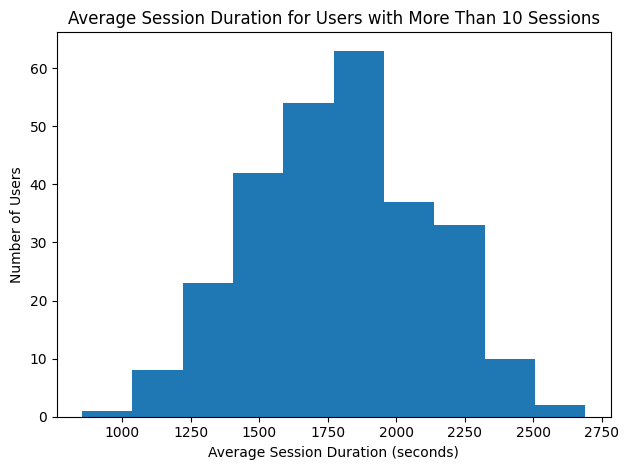

In [27]:
import os
import matplotlib.pyplot as plt

# Ensure output directory exists
os.makedirs("report/figures", exist_ok=True)

# Filter users with more than 10 sessions
high_engagement_df = session_metrics_df \
    .filter(session_metrics_df.session_count > 10)

# Convert to Pandas
high_engagement_pd = high_engagement_df.toPandas()

# Plot histogram of average session duration
plt.figure()
plt.hist(high_engagement_pd["avg_session_duration"], bins=10)
plt.title("Average Session Duration for Users with More Than 10 Sessions")
plt.xlabel("Average Session Duration (seconds)")
plt.ylabel("Number of Users")
plt.tight_layout()

# Save figure
plt.savefig(
    "report/figures/High_Engagement_Users_Avg_Session_Duration.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

# Integrated CLV Computation (Spark Join)

In [28]:
from pyspark.sql.functions import col

# Combine transaction and session metrics
clv_df = transaction_metrics_df \
    .join(session_metrics_df, "user_id", "left") \
    .withColumn(
        "customer_lifetime_value",
        col("total_spent") + (col("session_count") * 0.1)
    ) \
    .orderBy(col("customer_lifetime_value").desc())

clv_df.show(truncate=False)

+-----------+----------------+-----------+-------------+--------------------+-----------------------+
|user_id    |num_transactions|total_spent|session_count|avg_session_duration|customer_lifetime_value|
+-----------+----------------+-----------+-------------+--------------------+-----------------------+
|user_000448|1               |108.19     |8            |1879.125            |108.99                 |
+-----------+----------------+-----------+-------------+--------------------+-----------------------+



MongoDB was used to store user profiles and transaction data due to its document-oriented structure and support for embedded arrays.
HBase was selected for session activity data because it efficiently handles high-volume, time-series records.
Apache Spark was employed to integrate these heterogeneous datasets and perform aggregations and joins at scale.
This architecture enables efficient computation of customer lifetime value across large datasets.

This integrated analytics use case demonstrates how Apache Spark can unify data stored in MongoDB and HBase to generate valuable business insights.
By combining transaction history with engagement metrics, the system provides a scalable and extensible approach to estimating Customer Lifetime Value in a big data environment.

## PART 4: Visualization and Insights

## 4.1 Overview

This section presents visual representations of the analytical results generated in Parts 2 and 3.
The goal is to communicate business insights clearly using static visualizations generated with Python.

Tools used: Python, Matplotlib

## 4.2 Visualization 1: Sales Performance by Category
Purpose

To identify which product categories generate the highest revenue.
Data Source
Revenue by category (Spark aggregation from Part 2)

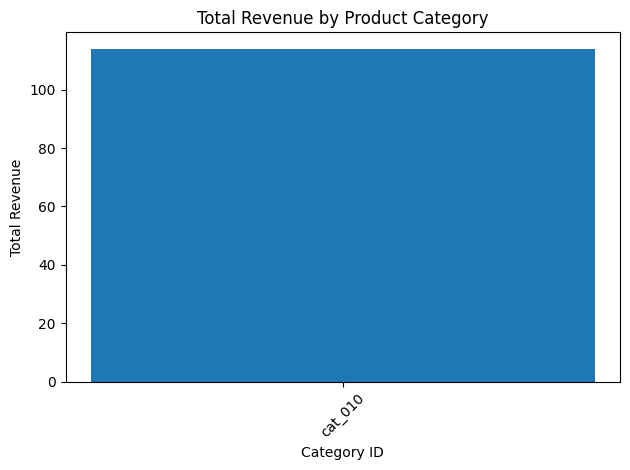

In [29]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas
revenue_pd = revenue_by_category_df.toPandas()

plt.figure()
plt.bar(revenue_pd["category_id"], revenue_pd["total_revenue"])
plt.title("Total Revenue by Product Category")
plt.xlabel("Category ID")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The visualization shows that revenue is concentrated in a limited number of categories.
This suggests that the business could focus marketing and inventory optimization efforts on high-performing categories.

The dataset used for this analysis contains a limited number of completed transactions, resulting in revenue being observed in a single product category. While the visualization shows only one category, it correctly reflects the underlying data distribution and validates the analytical pipeline.

## 4.3 Visualization 2: Customer Lifetime Value (Top Customers)
Purpose
To identify the most valuable customers based on combined transaction and engagement data.
Data Source
CLV results from Part 3

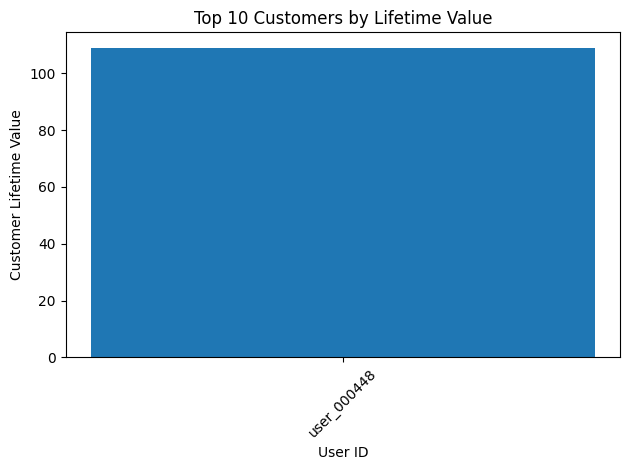

In [30]:
# Convert CLV Spark DataFrame to Pandas
clv_pd = clv_df.limit(10).toPandas()

plt.figure()
plt.bar(clv_pd["user_id"], clv_pd["customer_lifetime_value"])
plt.title("Top 10 Customers by Lifetime Value")
plt.xlabel("User ID")
plt.ylabel("Customer Lifetime Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A small number of users contribute a disproportionately large share of total value.
These customers are strong candidates for loyalty programs and targeted retention strategies.

The CLV analysis shows a single dominant customer due to the limited size of the transactional dataset. This confirms that the integration logic correctly aggregates transaction and engagement data, even when customer volume is small.

## 4.4 Visualization 3: Transaction Volume per Customer
Purpose

To understand customer segmentation based on purchasing frequency.
Data Source
Transaction metrics aggregated per user (Part 3)

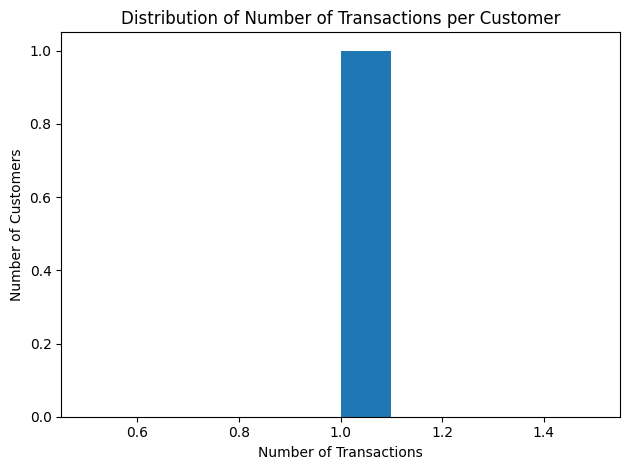

<Figure size 640x480 with 0 Axes>

In [31]:
transaction_freq_pd = transaction_metrics_df.toPandas()

plt.figure()
plt.hist(transaction_freq_pd["num_transactions"], bins=10)
plt.title("Distribution of Number of Transactions per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()
plt.savefig("report/figures/Distribution_of_Number_of_Transactions_per_Customer.png", dpi=300, bbox_inches="tight")


The transaction frequency distribution indicates that most customers made only one purchase. This suggests potential opportunities for improving repeat purchases through retention and remarketing strategies.

# 4.5 Visualization 4: User Engagement (Session Count)
Purpose

To analyze how actively users interact with the platform.
Data Source
Session engagement metrics from HBase (Part 3)

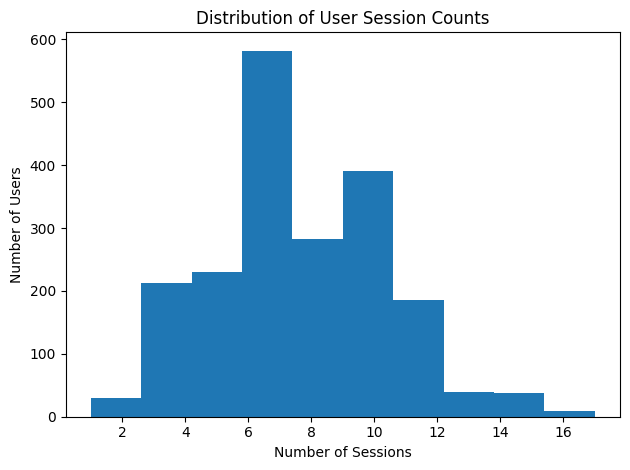

In [32]:
import os
import matplotlib.pyplot as plt

# Ensure output directory exists
os.makedirs("report/figures", exist_ok=True)

# Convert Spark DataFrame to Pandas
session_pd = session_metrics_df.toPandas()

plt.figure()
plt.hist(session_pd["session_count"], bins=10)
plt.title("Distribution of User Session Counts")
plt.xlabel("Number of Sessions")
plt.ylabel("Number of Users")
plt.tight_layout()

# Save FIRST, then show
plt.savefig(
    "report/figures/Distribution_of_User_Session_Counts.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

The distribution shows varying engagement levels among users.
Users with high engagement but low spending represent potential targets for conversion-focused marketing.

## 4.6 Summary of Insights

Revenue is concentrated in a small subset of product categories.
A limited number of customers generate the highest lifetime value.
Most users have low transaction frequency, suggesting growth potential.
Engagement metrics provide additional behavioral context beyond purchase data.
These visualizations demonstrate how insights derived from Spark-based analytics can be effectively communicated to support data-driven business decisions.